<a href="https://colab.research.google.com/github/Pythonimeislabor/repo1/blob/main/erstes_neuronales_Netz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datensatz von kaggle herunterladen

In [1]:
%%writefile kaggle.json
{"username":"lutze3","key":"c1b954a36f5402b976973271cb154a2f"}

Writing kaggle.json


In [2]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle
!kaggle datasets download -d jcprogjava/handwritten-digits-dataset-not-in-mnist
!unzip handwritten-digits-dataset-not-in-mnist.zip

from IPython.display import clear_output
clear_output()

# imports

In [3]:
import cv2
import matplotlib.pyplot as plt

# Testweise ein Bild laden und anzeigen

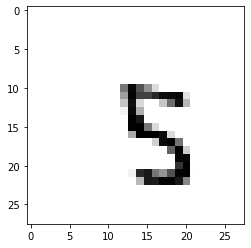

In [4]:
dateipfad = "dataset/5/5/0.png"
bild = cv2.imread(dateipfad, cv2.IMREAD_UNCHANGED) # bild lesen
plt.imshow(bild)

(28, 28)


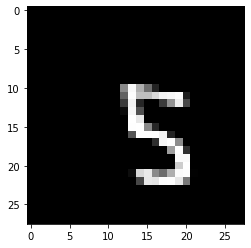

In [5]:
bild_in_grau = bild[:,:,3]
print(bild_in_grau.shape)
plt.imshow(bild_in_grau, cmap="gray")

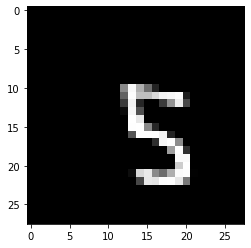

In [6]:
bild_0_1 = bild_in_grau / 255 # bild zwischen 0 und 1 skalieren
plt.imshow(bild_0_1, cmap = "gray")

# Alle Bilder und Beschriftungen in 2 Listen speichern

In [7]:
#X = [bild1, bild2, bild3]
#Y = [Beschriftung1, Beschriftung2, Beschriftung3]

X = []
Y = []

import os

def lade_bild(pfad):
  bild = cv2.imread(pfad, cv2.IMREAD_UNCHANGED) # bild lesen im bgra-format
  bild_in_grau = bild[:,:,3]
  bild_0_1 = bild_in_grau / 255 # bild zwischen 0 und 1 skalieren
  return bild_0_1


for zahl in range(10):
  pfad = "dataset/"+str(zahl)+"/"+str(zahl) + "/"
  print(pfad)
  alle_bilder_namen = os.listdir(pfad) # alle bilder im pfad auflisten
  for name in alle_bilder_namen: # alle bilder in dem Ordner durchgehen
    pfad_zum_bild = pfad + name 
    bild = lade_bild(pfad_zum_bild)

    X.append(bild)
    Y.append(zahl)

dataset/0/0/
dataset/1/1/
dataset/2/2/
dataset/3/3/
dataset/4/4/
dataset/5/5/
dataset/6/6/
dataset/7/7/
dataset/8/8/
dataset/9/9/


Y ist  4


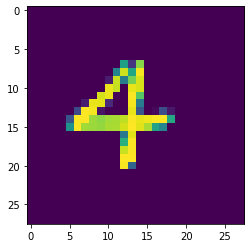

In [8]:
index = 50000

plt.imshow(X[index]), 
print("Y ist ", Y[index])

In [9]:
import numpy as np

# listen in numpy arrays umwandeln
Y = np.array(Y) # numpy arrays sind für viele Elemente eine bessere speichermethode
X = np.array(X) # tensorflow benötigt numpy arrays und kann nicht mit listen arbeiten

p = np.random.permutation(Y.shape[0]) # X und Y gleichmäßig mischen
X = X[p]
Y = Y[p] 

# Neuronales Netzwerk bauen

In [25]:
import tensorflow as tf

inputlayer = tf.keras.layers.Input(shape=(28,28))
platt_gemacht = tf.keras.layers.Flatten()(inputlayer)
dense1 = tf.keras.layers.Dense(8,activation="sigmoid")(platt_gemacht)
dense2 = tf.keras.layers.Dense(8,activation="sigmoid")(dense1)
output = tf.keras.layers.Dense(10,activation="softmax")(dense2)

model = tf.keras.Model(inputlayer, output)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 8)                 6280      
                                                                 
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 10)                90        
                                                                 
Total params: 6,442
Trainable params: 6,442
Non-trainable params: 0
_________________________________________________________________


In [26]:
fehlerfunktion = tf.keras.losses.SparseCategoricalCrossentropy()
optimierer = tf.keras.optimizers.SGD(0.05, momentum = 0.5)
model.compile(optimierer, fehlerfunktion, metrics="accuracy")

In [27]:
model.fit(X, Y, batch_size = 32, epochs = 5, validation_split = 0.2) # Parameter optimieren

Epoch 1/5
2694/2694 [==============================] - 6s 2ms/step - loss: 2.0136 - accuracy: 0.3021 - val_loss: 1.4771 - val_accuracy: 0.5511
Epoch 2/5
2694/2694 [==============================] - 6s 2ms/step - loss: 1.0032 - accuracy: 0.7047 - val_loss: 0.6955 - val_accuracy: 0.8177
Epoch 3/5
2694/2694 [==============================] - 6s 2ms/step - loss: 0.5664 - accuracy: 0.8497 - val_loss: 0.4653 - val_accuracy: 0.8784
Epoch 4/5
2694/2694 [==============================] - 6s 2ms/step - loss: 0.4047 - accuracy: 0.8950 - val_loss: 0.3808 - val_accuracy: 0.8931
Epoch 5/5
2694/2694 [==============================] - 6s 2ms/step - loss: 0.3233 - accuracy: 0.9142 - val_loss: 0.2959 - val_accuracy: 0.9202


# Test mit selbstgemaltem Bild

Die Entscheidungen sind: [[7.0651149e-05 2.3518379e-01 3.1106526e-02 2.2428995e-03 4.1315287e-01
  2.1757056e-01 2.6793685e-03 3.9986372e-02 1.2528369e-06 5.8005754e-02]]
Das ist die Zahl: 4


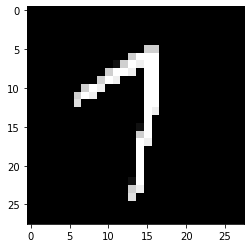

In [28]:
bild = cv2.imread("Untitled.png", cv2.IMREAD_GRAYSCALE) # bild lesen im graustufen-format
bild_0_1 = 1 - bild / 255 # bild zwischen 0 und 1 skalieren

plt.imshow(bild_0_1, cmap = "gray")
bild_batch = np.reshape(bild_0_1,(1,28,28))
entscheidungen = model(bild_batch)
print("Die Entscheidungen sind:", entscheidungen.numpy())
print("Das ist die Zahl:", np.argmax(entscheidungen.numpy()))